In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import scipy.ndimage
from scipy import misc
from glob import glob
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skimage
import imageio
import seaborn as sns
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [2]:
df = pd.read_csv('labels_train.csv')
df.shape
df

file_name  class_id
0     img_4358977458434011046.jpg         1
1     img_5224016757187192130.jpg         2
2     img_3065202206106254707.jpg         2
3     img_6304894865561547174.jpg         1
4     img_3371338542810939877.jpg         2
...                           ...       ...
4667  img_6661311872293090412.jpg         2
4668  img_3844568579349757418.jpg         1
4669  img_9145812369383814369.jpg         1
4670  img_1311393330250392648.jpg         1
4671  img_3089041144907674826.jpg         1

[4672 rows x 2 columns]

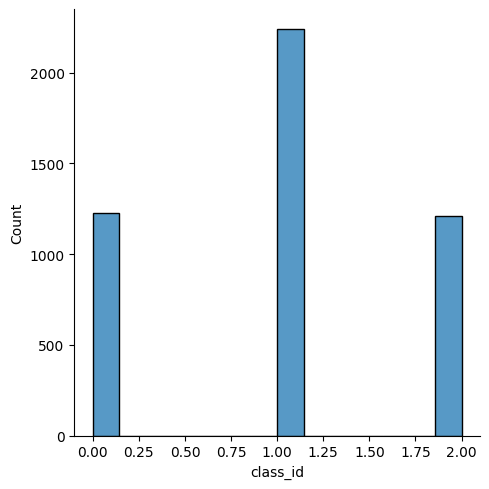

In [4]:
sns.displot(df['class_id'])

In [5]:
df['class_id'].value_counts()

#calculate the median frequency of each dx
df['class_id'].value_counts().median()

#calculate the class weights by iterating through each label and computing the inverse of the median frequency

weights = 1 / df['class_id'].value_counts()
weights = weights / weights.median()
weights

class_id
1    0.548257
0    1.000000
2    1.016570
Name: count, dtype: float64

In [46]:
import os
import shutil


# Need to create folders for each dx time to store the images
types = df['class_id'].unique()
print(types)

for type in types:
    if not os.path.exists(str(type)):
        os.makedirs(str(type))

for data in df['file_name']:
    image_id = data
    image_dx = df.loc[df['file_name'] == image_id, 'class_id'].values[0]
    #print(str(image_id) + ' ' + str(image_dx))

    path = os.path.join('train_images', image_id)
    #print(str(path))
    destination = os.path.join(str(image_dx), str(image_id))
    #print(str(destination))

    if os.path.exists(str(path)):
        #print('hello')
        shutil.move(path, destination)

    

[1 2 0]


/var/folders/91/j3wbsnn55_j01_pwds9s2lw00000gn/T/ipykernel_1577/788354366.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


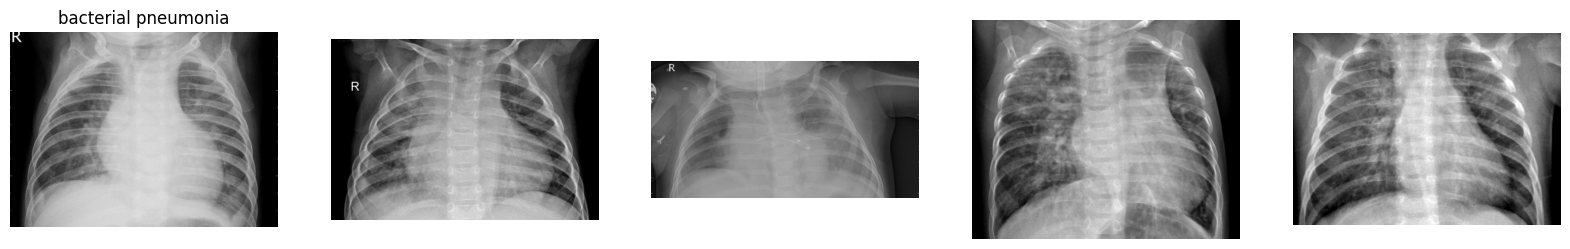

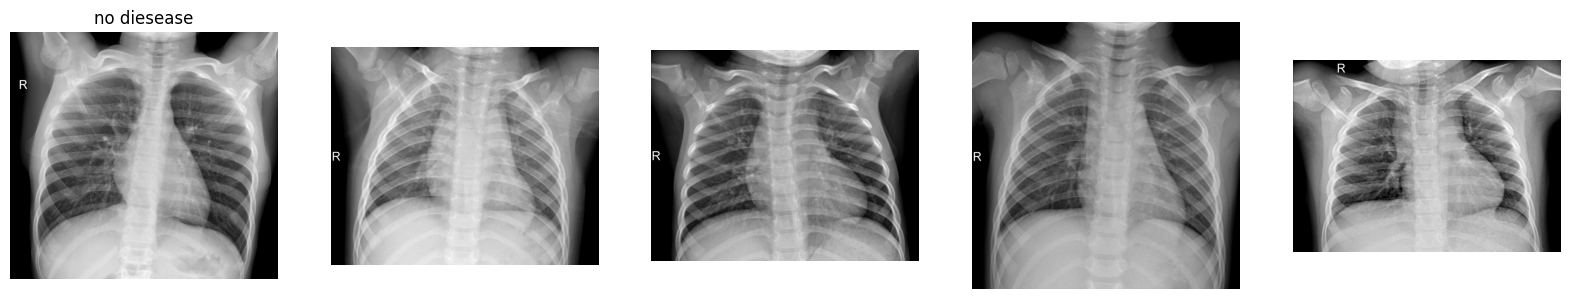

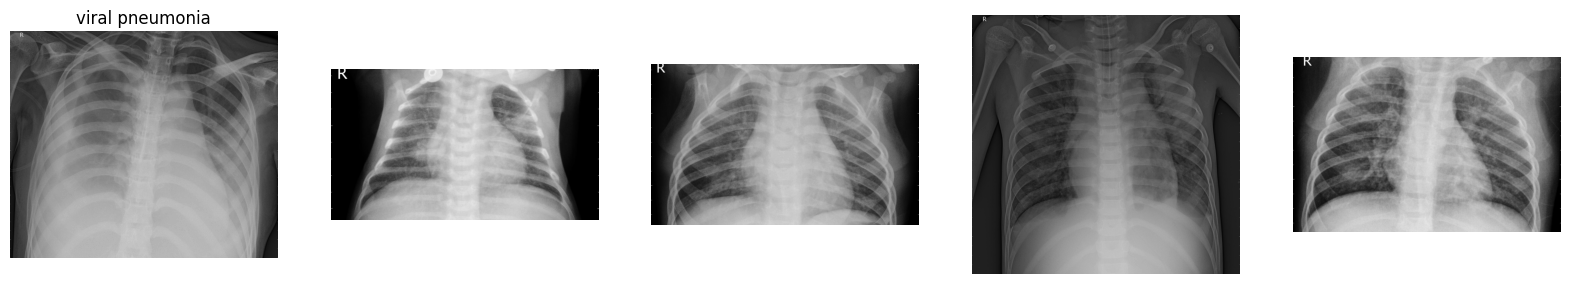

In [52]:
#Visualizing the images

label = [ '1', '0', '2']
label_images = []
classes = [ 'bacterial pneumonia', 'no diesease', 'viral pneumonia']

# visualize 5 images for each class

for i in range(3):
    images = []
    for j in range(5):
        path = os.path.join(label[i], os.listdir(label[i])[j])
        images.append(imageio.imread(path))
    label_images.append(images)

for i in range(3):
    plt.figure(figsize=(20, 10))
    for j in range(5):
        plt.subplot(1, 5, j+1)
        plt.imshow(label_images[i][j], cmap='gray', vmin=0, vmax=255)
        #only show the class name once for each class
        if j == 0:
            plt.title(classes[i])
        plt.axis('off')



